**Objective**: Demonstrate basic Python skills and data manipulation using Pandas.

**Tasks**:
- Load a given CSV file containing metal prices into a Pandas DataFrame.
- Filter the data to include only 'Copper' and 'Zinc' for the year 2021.
- Calculate the average price per month for each metal and plot it.

# Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Explore the data

Before importing the data, we've manually inspected the .csv file. It was identified that the first 6 rows contain unwanted data, and the data columns appear in the order: `'Dates', 'COPPER', 'ALUMINUM', 'ZINC', 'LEAD', 'TIN', 'Genric Future'`.

With these knowledge, we'll import the data,  skipping first 6 columns and set new column names accordingly.

In [2]:
# Import csv data
df = pd.read_csv('../data/MarketData.csv', skiprows=6) # Skip the first 6 rows
df.columns = ['Dates', 'COPPER', 'ALUMINUM', 'ZINC', 'LEAD', 'TIN', 'Genric Future']

# Set Dates columns as index and change data type
df.set_index('Dates', inplace=True)
df.index = pd.to_datetime(df.index)

Next, we'll get an overview look at our newly imported data frame using `df.head()`, `df.tail()` and `df.sample()`. This helps to understand the structure, check data types and identify any issues.

In [3]:
# First 5 rows
df.head(5)

,COPPER,ALUMINUM,ZINC,LEAD,TIN,Genric Future
Dates,,,,,,
2010-01-01,7375.0,2230.0,2560.0,2432.0,16950,79.36
2010-04-01,7500.0,2267.0,2574.0,2515.0,17450,81.51
2010-05-01,7485.0,2302.0,2575.0,2522.5,17375,81.77
2010-06-01,7660.0,2377.0,2718.0,2680.0,17825,83.18
2010-07-01,7535.0,2310.0,2607.0,2599.0,17475,82.66


In [4]:
# Last 5 rows
df.tail(5)

,COPPER,ALUMINUM,ZINC,LEAD,TIN,Genric Future
Dates,,,,,,
2022-12-26,8349.5,2389.5,2965.0,2273.5,23934,79.56
2022-12-27,8349.5,2389.5,2965.0,2273.5,23934,79.53
2022-12-28,8443.0,2381.0,3005.5,2218.0,24734,78.96
2022-12-29,8418.0,2405.0,2984.5,2272.5,24915,78.40
2022-12-30,8372.0,2378.0,2972.5,2293.0,24808,80.26


In [5]:
# Sample 10 random rows
df.sample(10)

,COPPER,ALUMINUM,ZINC,LEAD,TIN,Genric Future
Dates,,,,,,
2018-01-03,6922.0,2147.0,3407.0,2445.0,21655,60.99
2014-01-10,6680.0,1921.0,2270.0,2093.0,20345,90.73
2021-11-18,9441.5,2616.0,3159.0,2215.0,38453,79.01
2014-06-01,7325.0,1782.5,2034.0,2165.0,21725,93.43
2011-10-31,7990.0,2218.0,2000.0,2082.0,22000,93.19
2020-09-14,6796.0,1800.5,2480.5,1927.0,18155,37.26
2013-05-23,7300.0,1850.0,1856.0,2044.0,21000,94.25
2015-05-25,6161.5,1768.0,2178.0,1947.0,15775,59.72
2015-02-01,6255.0,1832.0,2205.0,1870.0,19645,52.69


The first and last 5 rows of our dataframe match the .csv file, indicating our import was correct.  However, the Dates are in random order, which can affect future analysis, especially for rolling calculations, resulting in incorrect results. Additionally, chronological time index helps with debugging (e.g. easier to trace error during data transformation) and provide more consistent visualisation.

We'll need to sort the Dates index in chronological order.

In [6]:
# Sort datatime by ascending order
df.sort_index(ascending=True, inplace=True)
df

,COPPER,ALUMINUM,ZINC,LEAD,TIN,Genric Future
Dates,,,,,,
2010-01-01,7375.0,2230.0,2560.0,2432.0,16950,79.36
2010-01-02,6790.0,2085.0,2145.0,2045.0,16150,74.43
2010-01-03,7400.0,2143.0,2220.0,2170.0,17050,78.70
2010-01-04,7885.0,2352.0,2403.0,2210.0,18450,84.87
2010-01-06,6750.0,1990.5,1853.0,1750.0,17800,72.58
...,...,...,...,...,...,...
2022-12-26,8349.5,2389.5,2965.0,2273.5,23934,79.56
2022-12-27,8349.5,2389.5,2965.0,2273.5,23934,79.53
2022-12-28,8443.0,2381.0,3005.5,2218.0,24734,78.96


Next we'll get basic information about data structure, concent and basic statistics with `df.describe()` and `df.info()`. We'll also thoroughly check for missing data with `df.isnull()`.

In [7]:
# Basic statistics about data
df.describe()

,COPPER,ALUMINUM,ZINC,LEAD,TIN,Genric Future
count,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000
mean,7073.268136,2044.883368,2425.526983,2101.813624,21815.800354,71.265609
std,1445.298014,371.836629,532.255750,242.304832,5901.536275,22.736368
min,4331.000000,1435.500000,1468.000000,1554.000000,13250.000000,-37.630000
25%,5957.500000,1791.000000,2015.250000,1933.750000,18195.000000,51.635000
50%,6939.000000,1970.000000,2302.000000,2090.000000,20400.000000,70.050000
75%,7988.750000,2231.000000,2774.500000,2270.250000,23175.000000,92.300000
max,10674.000000,3849.000000,4498.500000,2855.000000,48650.000000,123.700000


In [8]:
# Check for data types of each columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3391 entries, 2010-01-01 to 2022-12-30
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   COPPER         3391 non-null   float64
 1   ALUMINUM       3391 non-null   float64
 2   ZINC           3391 non-null   float64
 3   LEAD           3391 non-null   float64
 4   TIN            3391 non-null   int64  
 5   Genric Future  3391 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 185.4 KB
None


In [9]:
# Check for columns with null data
df.isnull().any()

COPPER           False
ALUMINUM         False
ZINC             False
LEAD             False
TIN              False
Genric Future    False
dtype: bool

The results from `df.describe()` show there are no unusually large or small values, and the data distribution (25th, 50th, and 75th percentiles) are sensibly spaced. This suggests there are no outliers in our dataframe.

`df.info()` and `df.isnull()` show there are no null values. We also note that prices of Tin are integers whilst the rest of the metals are floats.

# Filter the data to include only 'Copper' and 'Zinc' for the year 2021

We'll use `df.loc` and apply conditions to choose desired Dates index range. Then, we'll choose only prices for 'COPPER' and 'ZINC'.

In [10]:
# Filter data for the year 2021 
df_2021=df.loc[(df.index < '01-01-2022') & (df.index >= '01-01-2021')]

# Filter columns 'Copper' and 'Zinc'.
labels = ['COPPER', 'ZINC']
df_filtered = df_2021.loc[:, labels]
print(df_filtered)  # Use print() to get number of rows and columns

             COPPER    ZINC
Dates                      
2021-01-01   7766.0  2751.0
2021-01-02   7798.5  2570.5
2021-01-03   9044.0  2816.0
2021-01-04   8790.0  2774.5
2021-01-06  10245.0  3064.0
...             ...     ...
2021-12-27   9568.0  3519.0
2021-12-28   9568.0  3519.0
2021-12-29   9680.5  3513.0
2021-12-30   9691.5  3532.5
2021-12-31   9720.5  3534.0

[261 rows x 2 columns]


There are 261 days in this dataframe, which is equal to number of working days in 2021. We're confident of our filtered dataframe.

# Calculate the average price per month for each metal and plot it

We'll create new time features in the dataframe to easily access `day`, `month`, `year` values.

In [11]:
# Create time series features based on time series index.
def create_time_features(df):
    df = df.copy()
    df["day"] = df.index.day    
    df["month"] = df.index.month
    df["year"] = df.index.year
    
    return df

df_filtered = create_time_features(df_filtered)
print(df_filtered)

             COPPER    ZINC  day  month  year
Dates                                        
2021-01-01   7766.0  2751.0    1      1  2021
2021-01-02   7798.5  2570.5    2      1  2021
2021-01-03   9044.0  2816.0    3      1  2021
2021-01-04   8790.0  2774.5    4      1  2021
2021-01-06  10245.0  3064.0    6      1  2021
...             ...     ...  ...    ...   ...
2021-12-27   9568.0  3519.0   27     12  2021
2021-12-28   9568.0  3519.0   28     12  2021
2021-12-29   9680.5  3513.0   29     12  2021
2021-12-30   9691.5  3532.5   30     12  2021
2021-12-31   9720.5  3534.0   31     12  2021

[261 rows x 5 columns]


To calculate average price per month for each metal, first we'll combine rows of the same month using `groupby()`, then calculate their averages using `mean()`.

In [12]:
df_grouped = df_filtered.groupby("month")[labels].mean()
df_grouped

,COPPER,ZINC
month,,
1,8432.826087,2795.913043
2,9057.000000,2907.131579
3,9091.476190,2877.904762
4,9337.477273,2884.522727
5,9687.113636,2958.522727
6,9358.071429,2943.166667
7,9474.045455,2982.386364
8,9227.804348,2990.086957
9,9266.478261,3031.500000


Finally, we'll plot the average prices.

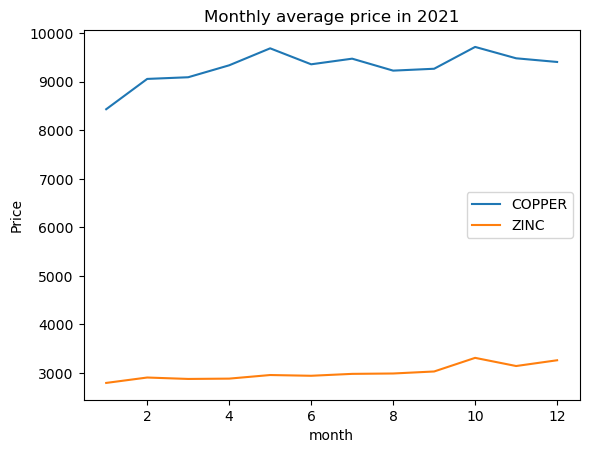

In [13]:
df_grouped.plot(title="Monthly average price in 2021", xlabel="month", ylabel="Price")
plt.show()

# Improvements

[-] Automatically detect and remove the unwanted rows at the beginning of .csv file. The current solution requires manual inspection of the .csv file.